# Exploratory Analysis of Prosper Loan Data
## by Chen Yi Fei

## Investigation Overview

> The presentation is to show observation of main features that explain Lender Yield cost and defaulted cases. 

## Dataset Overview

> This dataset is financial dataset and this is related to the loan, borrowers, lenders, interest rates and stuffs like that. This data set contains 113,937 loans with 81 variables on each
loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_loandata = pd.read_csv('prosperLoanData.csv')

In [3]:
df_loandata.rename(columns={'ProsperRating (numeric)':'ProsperRating_num', 
                            'ProsperRating (Alpha)':'ProsperRating_alpha', 
                            'ListingCategory (numeric)':'ListingCategory_num',
                            'TradesNeverDelinquent (percentage)':'TradesNeverDelinquent_percent'},inplace=True)

In [5]:
## drop duplicate loans according to LoanNumber
df_loandata.drop_duplicates(subset='LoanNumber',inplace=True)
df_loandata['default_flag'] = (df_loandata.LoanStatus=='Defaulted')


In [10]:
## loan origination date
df_loandata.LoanOriginationDate = pd.to_datetime(df_loandata.LoanOriginationDate)
df_loandata['LoanOriginationDate_y'] = df_loandata.LoanOriginationDate.dt.year
df_loandata.LoanOriginationDate = pd.to_datetime(df_loandata.LoanOriginationDate)
df_loandata['LoanOriginationDate_y'] = df_loandata.LoanOriginationDate.dt.year

In [14]:
df_default=df_loandata.copy()
df_default=df_default[df_default['LoanStatus']=='Defaulted'].reset_index(drop=True)
df_default.shape

(5018, 83)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## The main features of defaulted cases


#### 1. High default probability appears in early year when the loan was originated from 2006 to 2008.

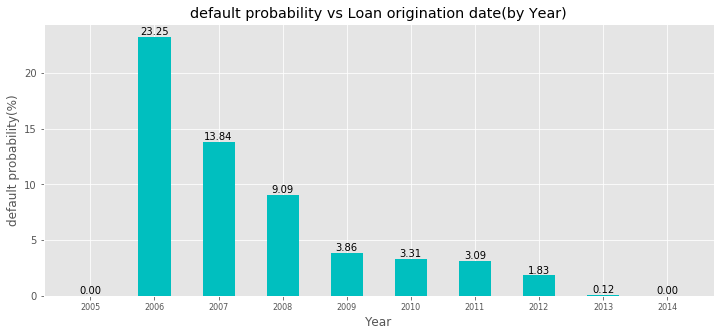

In [37]:
ax= df_default['LoanOriginationDate_y'].value_counts() / df_loandata['LoanOriginationDate_y'].value_counts()
ax.fillna(0,inplace=True)
#ax.plot.bar();
plt.figure(figsize=(12,5))
plt.bar(ax.index,100*(ax.values),width=0.5,align='center',color='c')
plt.title("default probability vs Loan origination date(by Year)");
plt.xticks(ax.index,fontsize=8)
plt.xlabel("Year");
plt.ylabel("default probability(%)");

for a,b in zip(ax.index,100*ax.values):
    plt.text(a,b+0.01,'%.2f'%b,ha = 'center',va = 'bottom',fontsize=10)

#### 2. High default probability appears in student groups.

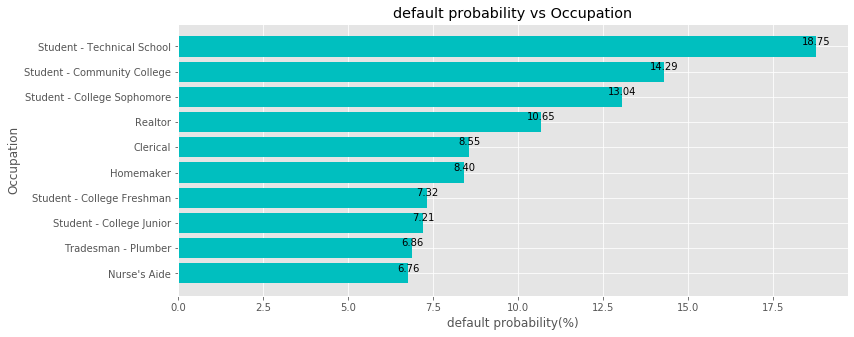

In [66]:
plt.figure(figsize=(12,5))
default_occup = df_default.Occupation.value_counts()/df_loandata.Occupation.value_counts()
default_occup.dropna(inplace=True)
default_occup.sort_values(ascending=True,inplace=True)
default_occup_top10 = default_occup.tail(10)
index=default_occup_top10.index
values=default_occup_top10.values

plt.barh(index,100*values,align='center',color='c')
plt.title("default probability vs Occupation");
plt.xlabel("default probability(%)");
plt.ylabel("Occupation");

for a,b in zip(index,100*values):
    plt.text(b+0.01,a,'%.2f'%b,ha = 'center',va = 'bottom',fontsize=10)

## Lender yield of defaulted group is on average higher than non-defaulted group.

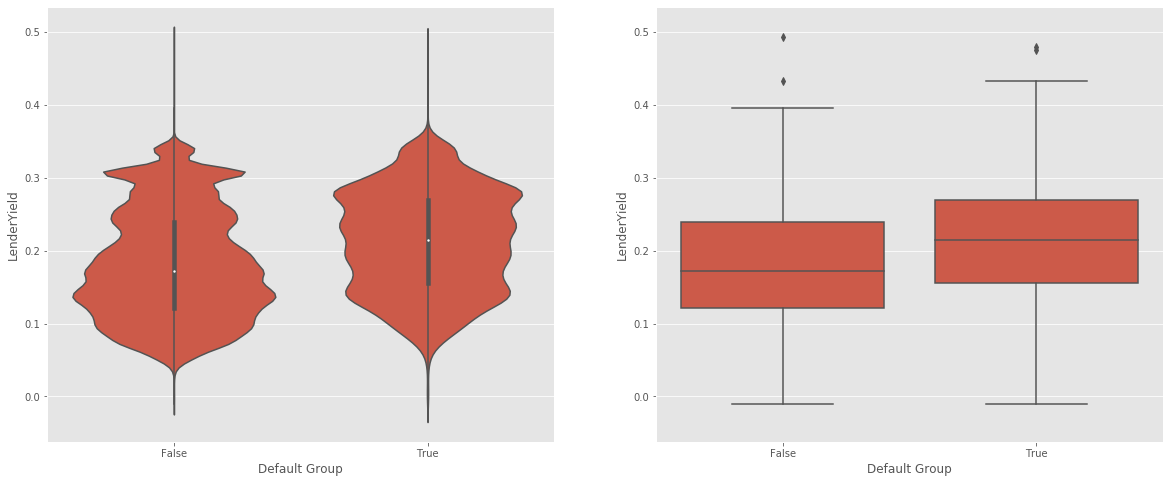

In [72]:
plt.figure(figsize = [20, 8])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_loandata, x = 'default_flag', y = 'LenderYield', color = base_color);
plt.xlabel("Default Group");

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df_loandata, x = 'default_flag', y = 'LenderYield', color = base_color);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot
plt.xlabel("Default Group");

## Lender yield of default group is on average higher across each income range group  



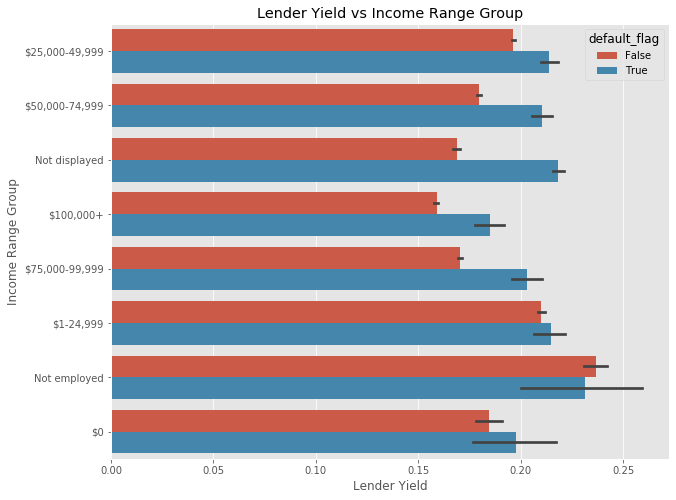

In [75]:
plt.figure(figsize = [10, 8])
ax = sb.barplot(data = df_loandata, x = 'LenderYield' ,y ='IncomeRange' , hue ='default_flag')
plt.title("Lender Yield vs Income Range Group");
plt.xlabel("Lender Yield");
plt.ylabel("Income Range Group");

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!